<div style="padding: 40px;border:2px ridge black;margin: 48px 0px 48px 0px;">

    <p style="font-size: 3vw;text-align: center;padding: 20px;font-weight: bold;">
        Plant Stress via FAO-56</p>
  
    <img src="https://drive.google.com/uc?id=1TLUYQ7uSpISZI2V3CVF15XrhhiJPENj1" 
         style="width:80vw;height:auto;padding: 40px;"
             align="center">
     
    <p style="font-size: 2vw;text-align: center;padding: 20px;font-weight: bold;">
        Will Dodge | Spring 2018</p>

</div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

<div style="padding: 10px;border:2px ridge black;margin: 24px 0px 24px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Import required libraries</p>
</div>

In [2]:
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
import numpy.polynomial.polynomial as poly
import ipywidgets as ipyw
from IPython.display import display, HTML
import pandas as pd
import math
import numpy as np
import qgrid
from scipy import stats

<div style="padding: 10px;border:2px ridge black;margin: 24px 0px 24px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Observation data required for FAO-56</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The required parameters for calculating ET<sub>o</sub> are solar radiation, wind speed, air temperature, and relative humididity. The specifics of these observations is well documented in the publication this model is based upon. In the event that one is missing data or entire parameters the official documentation at the <a href="http://www.fao.org/docrep/X0490E/x0490e00.htm#Contents">FAO website</a> sould be consulted to determine the approach to calculating ETO without said missing variable.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1scDh_GzljhJ6AyVDlQz-k_ZadNvyW6Sc" 
         style="width:70vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Read weather data into data frame</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    In this script the raw <code>.csv</code> data is coming from a google drive shareable link. This is <b>great</b> because the notebook itself can be distributed without needing to also distrubute a slew of assocaited file data. The other thing is that users who execute this code will not have to adjust the filepath given to the <code>pd.read_csv()</code> command.

</p>   
</div>

In [3]:
DF = pd.read_csv("https://drive.google.com/uc?id=13dYnsPcDkeQFcQPPTByKXGRM9481eVN9") # 2001-2017 multi-year weather data USDA-ARS 4th st

#DF = pd.read_csv("https://drive.google.com/uc?id=1YiLueOw-vbVKIf2kvb9RRKY_hpsCj1zD") # single year daily tester set

In [4]:
DF[:5]

,date,year,day,radn.W/m2,maxt.C,mint.C,soiltemp.4in.C,soiltemp.8in.C,rain.mm,wind.2m.m/s,wind.10m.m/s,min.RH.%,max.RH.%,avg.RH.%
0,2001-01-01,2001,1,55.0,-0.9,-3.7,0.7,1.5,0.0,1.80,3.52,88.0,99.0,94.0
1,2001-01-02,2001,2,73.0,-1.6,-5.6,0.7,1.5,0.0,1.67,3.06,84.0,99.0,92.0
2,2001-01-03,2001,3,163.0,8.2,-5.9,0.4,1.2,0.0,1.87,3.58,56.0,92.0,77.0
3,2001-01-04,2001,4,163.0,15.2,-2.5,1.3,1.5,0.0,1.50,3.57,30.0,88.0,61.0
4,2001-01-05,2001,5,160.0,13.0,0.3,3.2,2.6,0.0,1.18,2.68,39.0,82.0,64.0


<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Handle date column</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    With time-series data the variable (column) of your dataset that contains the date and time information needs to be formatted as a datetime object. We can then set this column as the index for the dataframe so that the data is always handled in chronological order. This will expedite and simplify many of our later visualizations and data queries.   

</p>   
</div>

In [5]:
DF["date"] = pd.to_datetime(DF["date"])

In [6]:
DF = DF.set_index(DF["date"])

In [7]:
DF[:5] # note the date is now the index

,date,year,day,radn.W/m2,maxt.C,mint.C,soiltemp.4in.C,soiltemp.8in.C,rain.mm,wind.2m.m/s,wind.10m.m/s,min.RH.%,max.RH.%,avg.RH.%
date,,,,,,,,,,,,,,
2001-01-01,2001-01-01,2001,1,55.0,-0.9,-3.7,0.7,1.5,0.0,1.80,3.52,88.0,99.0,94.0
2001-01-02,2001-01-02,2001,2,73.0,-1.6,-5.6,0.7,1.5,0.0,1.67,3.06,84.0,99.0,92.0
2001-01-03,2001-01-03,2001,3,163.0,8.2,-5.9,0.4,1.2,0.0,1.87,3.58,56.0,92.0,77.0
2001-01-04,2001-01-04,2001,4,163.0,15.2,-2.5,1.3,1.5,0.0,1.50,3.57,30.0,88.0,61.0
2001-01-05,2001-01-05,2001,5,160.0,13.0,0.3,3.2,2.6,0.0,1.18,2.68,39.0,82.0,64.0


<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Calculate daily mean temperature, ℃</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    We need the daily temperature average. We caclulate this from the daily min and max temperature values from the raw data. I have included a line at the end of each step to show the output of our calculations. This is important so that we can monitor the output as we go and hopefully identify the source of any possible errors.  

</p>   
</div>

In [8]:
DF["avgt.C"] = (DF["mint.C"] + DF["maxt.C"]) / 2

In [9]:
DF["avgt.C"][:5]

date
2001-01-01   -2.30
2001-01-02   -3.60
2001-01-03    1.15
2001-01-04    6.35
2001-01-05    6.65
Name: avgt.C, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Calculate mean daily solar radiation (R<sub>s</sub>), MJ m<sup>-2</sup> day<sup>-1</sup></p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    This variable is calculated in our raw weather data but in different units than we require. So we need a conversion because the values for solar radiation are in W/m<sup>2</sup>.   

</p>   
</div>

In [10]:
DF["radn.W/m2"][:5] # W m^-2

date
2001-01-01     55.0
2001-01-02     73.0
2001-01-03    163.0
2001-01-04    163.0
2001-01-05    160.0
Name: radn.W/m2, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;padding: 20px 10px 5px 10px;font-weight: bold;">
        Convert daily solar from watts to megajoules, MJ m<sup>-2</sup> day<sup>-1</sup></p>
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">

    Here we make a conversion from W/m<sup>2</sup> to MJ m<sup>-2</sup> day<sup>-1</sup> by multiplying our observed solar by 0.0864.
</p>   
</div>

In [11]:
DF["radn.MJ/m2"] = DF["radn.W/m2"] * 0.0864

In [12]:
DF["radn.MJ/m2"][:5]

date
2001-01-01     4.7520
2001-01-02     6.3072
2001-01-03    14.0832
2001-01-04    14.0832
2001-01-05    13.8240
Name: radn.MJ/m2, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        The average daily wind speed (<i><b>u</b></i><sub>2</sub>), m s<sup>-1</sub></p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Measured two meters above a realatively flat surface. This in an observed value in our raw data already in correct units, <b>meters per second</b>. 
</p>   
</div>

In [13]:
DF["wind.2m.m/s"][:5]

date
2001-01-01    1.80
2001-01-02    1.67
2001-01-03    1.87
2001-01-04    1.50
2001-01-05    1.18
Name: wind.2m.m/s, dtype: float64

In [14]:
max(DF["wind.2m.m/s"]) # maximum mean daily wind for ten meters

10.46

In [15]:
max(DF["wind.10m.m/s"]) # maximum mean daily wind for ten meters

12.18

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;padding: 
              20px 10px 0px 10px;line-height: 1.5;"><b>Convert max wind averge to <i>miles per hour</i> to check data</b></p>
    
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">

    Our value is in meters per second but we can convert this to miles per hour. Divide the by <b>1609.34 meters to convert meters to miles</b> and then <b>multiply by 3600 seconds</b> to convert seconds to hours.

    </p>   
</div>

In [16]:
max_wind_avg_2m = (max(DF["wind.2m.m/s"]) / 1609.34) * 3600

In [17]:
max_wind_avg_2m # miles per hour

23.398411771285126

In [18]:
max_wind_avg_10m = (max(DF["wind.10m.m/s"]) / 1609.34) * 3600 

In [19]:
max_wind_avg_10m # miles per hour 

27.245951756620727

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Slope of the saturation vapor pressure curve (Delta), kPa</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1uA6Zo-K6dcbzuBiNDWyU_K61Tvd6pmH7" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [20]:
DF["delta"] = 4098 * (0.6106 * np.exp((17.27 * DF["avgt.C"])/(DF["avgt.C"] + 237.3))) / ((DF["avgt.C"] + 237.3)**2)

In [21]:
DF["delta"][:5]

date
2001-01-01    0.038264
2001-01-02    0.035114
2001-01-03    0.047831
2001-01-04    0.066110
2001-01-05    0.067326
Name: delta, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Atmospheric Pressure (P), kPa </p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    This is the pressure exerted by the weight of the earth's atmosphere. Altitude is factor when calculating this varaible. This model uses the equation in the following figure. We will make the calculation once in this model and use that as a contstant atmospheric pressure for this altitude. In the following equation <b>Z is altitude in meters</b>. 
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1pIpkTvzi88OcoCTiPHRPq7_Xu5lEX6dm" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [22]:
elevation = 992 # high plians of texas

In [23]:
P = 101.3 * (((293 - (0.0065 * elevation)) / 293) ** 5.26)

In [24]:
P # in kPa

90.11059920767981

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Psychrometric constant (gamma), kPa ℃<sup>-1</sup></p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    This variable is the relationsip between the partial pressure of water vapor in the air and temperature. It uses our calculated atmospheric pressure (P) value to estimate the psychrometric constant. This value will be used to calculate saturated vapor pressure.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1tBdICICKsNEwZg5GaYGTioVlA3a2aM2v" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [25]:
gamma = 0.000665 * P

In [26]:
gamma

0.059923548473107074

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Delta Term (DT), auxiliary calculation for the radiation term</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    To simplify the overall ET<sub>o</sub> we can calculate portions of the equation seperately. The Delta Term will be used to calculate our radiation driven ET<sub>o</sub> terms in later steps.  
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1vxH1NEzFgqZx81b4AJOwbz8ym0OtOFF6" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [27]:
DF["delta.term"] = DF["delta"] / (DF["delta"] + (gamma * (1 + 0.34 * DF["wind.2m.m/s"])))

In [28]:
DF["delta.term"][:5]

date
2001-01-01    0.283728
2001-01-02    0.272068
2001-01-03    0.327936
2001-01-04    0.422173
2001-01-05    0.445010
Name: delta.term, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Psi Term (PT), auxiliary calculation for the wind term</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Again, we make an auxiliary calculation to simplify the overall ET<sub>o</sub> process. The Psi Term will be used to calculate our wind driven ET<sub>o</sub> terms in later steps.  
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1yVSXpAr2bQOrUbF9vPwkcsRP3RI_jNav" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [29]:
DF["psi.term"] = gamma / (DF["delta"] + (gamma * (1 + 0.34 * DF["wind.2m.m/s"])))

In [30]:
DF["psi.term"][:5]

date
2001-01-01    0.444338
2001-01-02    0.464302
2001-01-03    0.410847
2001-01-04    0.382667
2001-01-05    0.396082
Name: psi.term, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Temperature Term (TT), auxiliary calculation for the wind term</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Again, we make an auxiliary calculation to simplify the overall ET<sub>o</sub> process. The Temperature Term will be used to calculate our wind driven ET<sub>o</sub> terms in later steps. This term incorperates the average daily temperature while the previous two auxiliary terms did not.  
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1000hFVfIePFDMbEvi4BEkoM6GS8gSvVO" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [31]:
DF["temp.term"] = (900 / (DF["avgt.C"] + 237)) * DF["wind.2m.m/s"]

In [32]:
DF["temp.term"][:5]

date
2001-01-01    6.902429
2001-01-02    6.439589
2001-01-03    7.066975
2001-01-04    5.547565
2001-01-05    4.358711
Name: temp.term, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Calculate mean saturation vapor pressure (e<sub>s</sub>), kPa</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Saturated vapor pressure is a fucntion of temperature and therefore can be calculated with air temperature. The following equation describes the relationship between temperature and saturated vapor pressure. <b>Temperature (T) is in degrees celcius</b>.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=12WEdLnr77AXwSWv-2_Ru7NjBRzPdv-91" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The approach will be to calculate a minimum and maximum daily saturated vapor pressure value and use those to calculate the daily mean value. We will use the following equations to calculate the minimums and maximums.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1LkqbHD6iqmhR9rpOsd3XUnOfhNjW5fs3" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [33]:
DF["max.sat.vap"] = 0.6108 * np.exp((17.27 * DF["maxt.C"]) / (DF["maxt.C"] + 237.3))

In [34]:
DF["max.sat.vap"][:5]

date
2001-01-01    0.571932
2001-01-02    0.543232
2001-01-03    1.087469
2001-01-04    1.727429
2001-01-05    1.497771
Name: max.sat.vap, dtype: float64

In [35]:
DF["min.sat.vap"] = 0.6108 * np.exp((17.27 * DF["mint.C"]) / (DF["mint.C"] + 237.3))

In [36]:
DF["min.sat.vap"][:5]

date
2001-01-01    0.464624
2001-01-02    0.402368
2001-01-03    0.393247
2001-01-04    0.508207
2001-01-05    0.624265
Name: min.sat.vap, dtype: float64

In [37]:
DF["mean.sat.vap"] = (DF["min.sat.vap"] + DF["max.sat.vap"]) / 2

In [38]:
DF["mean.sat.vap"][:5]

date
2001-01-01    0.518278
2001-01-02    0.472800
2001-01-03    0.740358
2001-01-04    1.117818
2001-01-05    1.061018
Name: mean.sat.vap, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Actual vapor pressure (e<sub>a</sub>) derived from relative humidity, kPa</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1l4_ZN1HjjDA4Lj1Oa09MyxPOWhqcC-Ch" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [39]:
DF["actual.vap"] = ((DF["min.sat.vap"] * (DF["max.RH.%"] / 100)) + (DF["max.sat.vap"] * (DF["min.RH.%"] / 100))) / 2

In [40]:
DF["actual.vap"][:5]

date
2001-01-01    0.481639
2001-01-02    0.427330
2001-01-03    0.485385
2001-01-04    0.482726
2001-01-05    0.548014
Name: actual.vap, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Inverse relative Earth-Sun distance (<i><b>d</b></i><sub>r</sub>) and solar declination (δ) </p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    We calculate these values so that we can estimate extraterrestrial radiation in the next equation. In the following equation <b><i>J</i> is the julian day or day of year</b> ranging from 1-365 on a non leap year. 
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1aPFBE1HI3ZqIxzWC8CzzIPdLOa8kLUHA" 
         style="width:38vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [41]:
DF["earth.sun.rel.dis"] = 1 + (0.033 * np.cos(((2 * math.pi)/365) * DF["day"]))

In [42]:
DF["earth.sun.rel.dis"][:5]

date
2001-01-01    1.032995
2001-01-02    1.032980
2001-01-03    1.032956
2001-01-04    1.032922
2001-01-05    1.032878
Name: earth.sun.rel.dis, dtype: float64

In [43]:
DF["solar.decl"] = 0.409 * np.sin((((2 * math.pi)/365) * DF["day"]) - 1.39)

In [44]:
DF["solar.decl"][:5]

date
2001-01-01   -0.401008
2001-01-02   -0.399564
2001-01-03   -0.398001
2001-01-04   -0.396320
2001-01-05   -0.394522
Name: solar.decl, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Conversion of latitude (<i><b>φ</b></i>) in degrees to radians</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Now we will begin a series of calculations required to calculate the incoming exraterrestrial radian. This will ultimately allow us to calculate a value for net radation from all sources in later steps.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1RIMx9JbdKT9IdUkbRpskh1b1bHdudQji" 
         style="width:40vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [45]:
lat_in_rad = (math.pi / 180) * (33.5947684)

In [46]:
lat_in_rad

0.5863393200249474

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Sunset hour angle (<b><i>ω<sub>s</sub></i></b>)
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Again, this calculation will be used in our estimation of extraterrestrial radiation.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1MqQgOs5djIuE97klAeGnjhavrdNyb8rT" 
         style="width:40vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [47]:
DF["sunset_angle"] = np.arccos(-math.tan(lat_in_rad) * np.tan(DF["solar.decl"]))

In [48]:
DF["sunset_angle"][:5]

date
2001-01-01    1.285296
2001-01-02    1.286475
2001-01-03    1.287748
2001-01-04    1.289115
2001-01-05    1.290575
Name: sunset_angle, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Extraterrestrial radiation (<b><i>R<sub>a</sub></i></b>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    This is the extratestrial radiation for each day. This calculation incorperates the previous compnents: <b><i>ω</i><b/><sub>s</sub>, 
    <b><i>d</i><b/><sub>r</sub>, <b><i>φ</i><b/>, <b><i>δ</i><b/>.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1u__eQbMEQ8fhCNn8vZgE-JkRuMxHfggL" 
         style="width:40vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [49]:
aa = DF["sunset_angle"]*np.sin(lat_in_rad)*np.sin(DF["solar.decl"])

In [50]:
bb = np.cos(lat_in_rad)*np.cos(DF["solar.decl"])*np.sin(DF["sunset_angle"])

In [51]:
DF["extraT_rad"] = (((24*60)/math.pi)*0.0820*DF["earth.sun.rel.dis"])*(aa + bb)

In [52]:
DF["extraT_rad"][:5]

date
2001-01-01    17.791824
2001-01-02    17.845786
2001-01-03    17.904024
2001-01-04    17.966519
2001-01-05    18.033250
Name: extraT_rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Clear sky solar radiation (R<sub>so</sub>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The calculation of the clear sky radiation is given by the following equation. <b><i>Z</i></b> the same elevation value we used previously.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1xNO_UtRH95ktX-bMdXTWPvywJDZpOyk1" 
         style="width:30vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [53]:
DF["clr_sky_rad"] = (0.75 + (2e-5)*elevation) * DF["extraT_rad"]

In [54]:
DF["clr_sky_rad"][:5]

date
2001-01-01    13.696858
2001-01-02    13.738400
2001-01-03    13.783234
2001-01-04    13.831345
2001-01-05    13.882717
Name: clr_sky_rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Net solar or net shortwave radiation (R<sub>ns</sub>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The calculation of the clear sky radiation is given by the following equation. <b><i>Z</i></b> the same elevation value we used previously.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1FqNN0XwKWUTnJ4DViKKHHVI1qLcKfjdS" 
         style="width:14vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [55]:
albedo = 0.23

In [56]:
DF["net.rad.MJ/m2*day"] = (1 - 0.23) * DF["radn.MJ/m2"]

In [57]:
DF["net.rad.MJ/m2*day"][:5]

date
2001-01-01     3.659040
2001-01-02     4.856544
2001-01-03    10.844064
2001-01-04    10.844064
2001-01-05    10.644480
Name: net.rad.MJ/m2*day, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Net outgoing long wave solar radiation (R<sub>nl</sub>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The rate of longwave energy emission is proportional to the absolute temperature of the surface raised to the fourth power. This is expressed in the <i>Stefan-Boltzman Law</i>. The net flux is less than Stefan-Boltzman, however. The abosrption and downward radiation from the sky reduces this enrgy flux. 
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1ZJSo4jsDwTGhpRqiSt1nraBGkeg7PhmU" 
         style="width:52vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [58]:
sb_const = 4.903e-9

In [59]:
DF["sb_flux"] = ((DF["maxt.C"]+273.16)**4 + (DF["mint.C"]+273.16)**4)/2

In [60]:
DF["outLW_rad"] = sb_const * (DF["sb_flux"] * (0.34-(0.14*np.sqrt(DF["actual.vap"])))*(1.35*(DF["radn.MJ/m2"]/DF["clr_sky_rad"]) - 0.35))

In [61]:
DF["outLW_rad"][:5]

date
2001-01-01    0.758705
2001-01-02    1.735893
2001-01-03    6.956119
2001-01-04    7.487326
2001-01-05    7.085060
Name: outLW_rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Net radiation (R<sub>n</sub>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Net radiation (R<sub>n</sub>) is the difference between the incoming net shortwave radiation (R<sub>ns</sub>) and the outgoing net longwave radiation (R<sub>nl</sub>). We can express this a mega joules and in terms of water.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1__YSiO1vUaCdLM6GD0zaqpeuRwQWR_Bp" 
         style="width:14vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [62]:
DF["total.net.rad"] = DF["net.rad.MJ/m2*day"] - DF["outLW_rad"]

In [63]:
DF["total.net.rad"][:5]

date
2001-01-01    2.900335
2001-01-02    3.120651
2001-01-03    3.887945
2001-01-04    3.356738
2001-01-05    3.559420
Name: total.net.rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    We can now convert the net solar radaition into mm of water by multiply our net radiation by a constant that represents the heat of vaporization of water.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1J5olunrf2YdLn5MznHQtOTdFVHBAvxSC" 
         style="width:16vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [64]:
DF["total.net.rad.mm"] = DF["total.net.rad"] * 0.408

In [65]:
DF["total.net.rad.mm"][:5]

date
2001-01-01    1.183337
2001-01-02    1.273225
2001-01-03    1.586281
2001-01-04    1.369549
2001-01-05    1.452243
Name: total.net.rad.mm, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.75vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Overall ET<sub>o</sub> equation
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    <b>Final radiation driven ET value, (ET<sub>rad</sub>), mm d<sup>-1</sup></b>
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=18GT2SUT_wUz-kf44eD4lCrdWFTDBQCF_" 
         style="width:28vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [66]:
DF["ET_rad"] = DF["delta.term"] * DF["total.net.rad.mm"]

In [67]:
DF["ET_rad"][:5]

date
2001-01-01    0.335745
2001-01-02    0.346404
2001-01-03    0.520199
2001-01-04    0.578187
2001-01-05    0.646263
Name: ET_rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.2vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    <b>Final wind driven ET value, (ET<sub>wind</sub>), mm d<sup>-1</sup></b>
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1MYEAhfSb0X8wXEO8Ki7Gp5ZyLKkh0A9d" 
         style="width:32vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [68]:
DF["ET_wind"] = DF["psi.term"]*DF["temp.term"]*(DF["mean.sat.vap"] - DF["actual.vap"])

In [69]:
DF["ET_wind"][:5]

date
2001-01-01    0.112372
2001-01-02    0.135952
2001-01-03    0.740301
2001-01-04    1.348218
2001-01-05    0.885654
Name: ET_wind, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.75vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    <b>Final Reference Evapotranspiration value, (ET<sub>o</sub>), mm d<sup>-1</sup></b>
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1iqqgHvmUCObACrWFP_3Zu6dbBKMe6hXA" 
         style="width:32vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [70]:
DF["ETo"] = DF["ET_rad"] + DF["ET_wind"]

In [71]:
DF["ETo"][:5]

date
2001-01-01    0.448118
2001-01-02    0.482356
2001-01-03    1.260500
2001-01-04    1.926405
2001-01-05    1.531916
Name: ETo, dtype: float64

In [72]:
DFxWeek = DF.resample('W').mean()

<IPython.core.display.Javascript object>


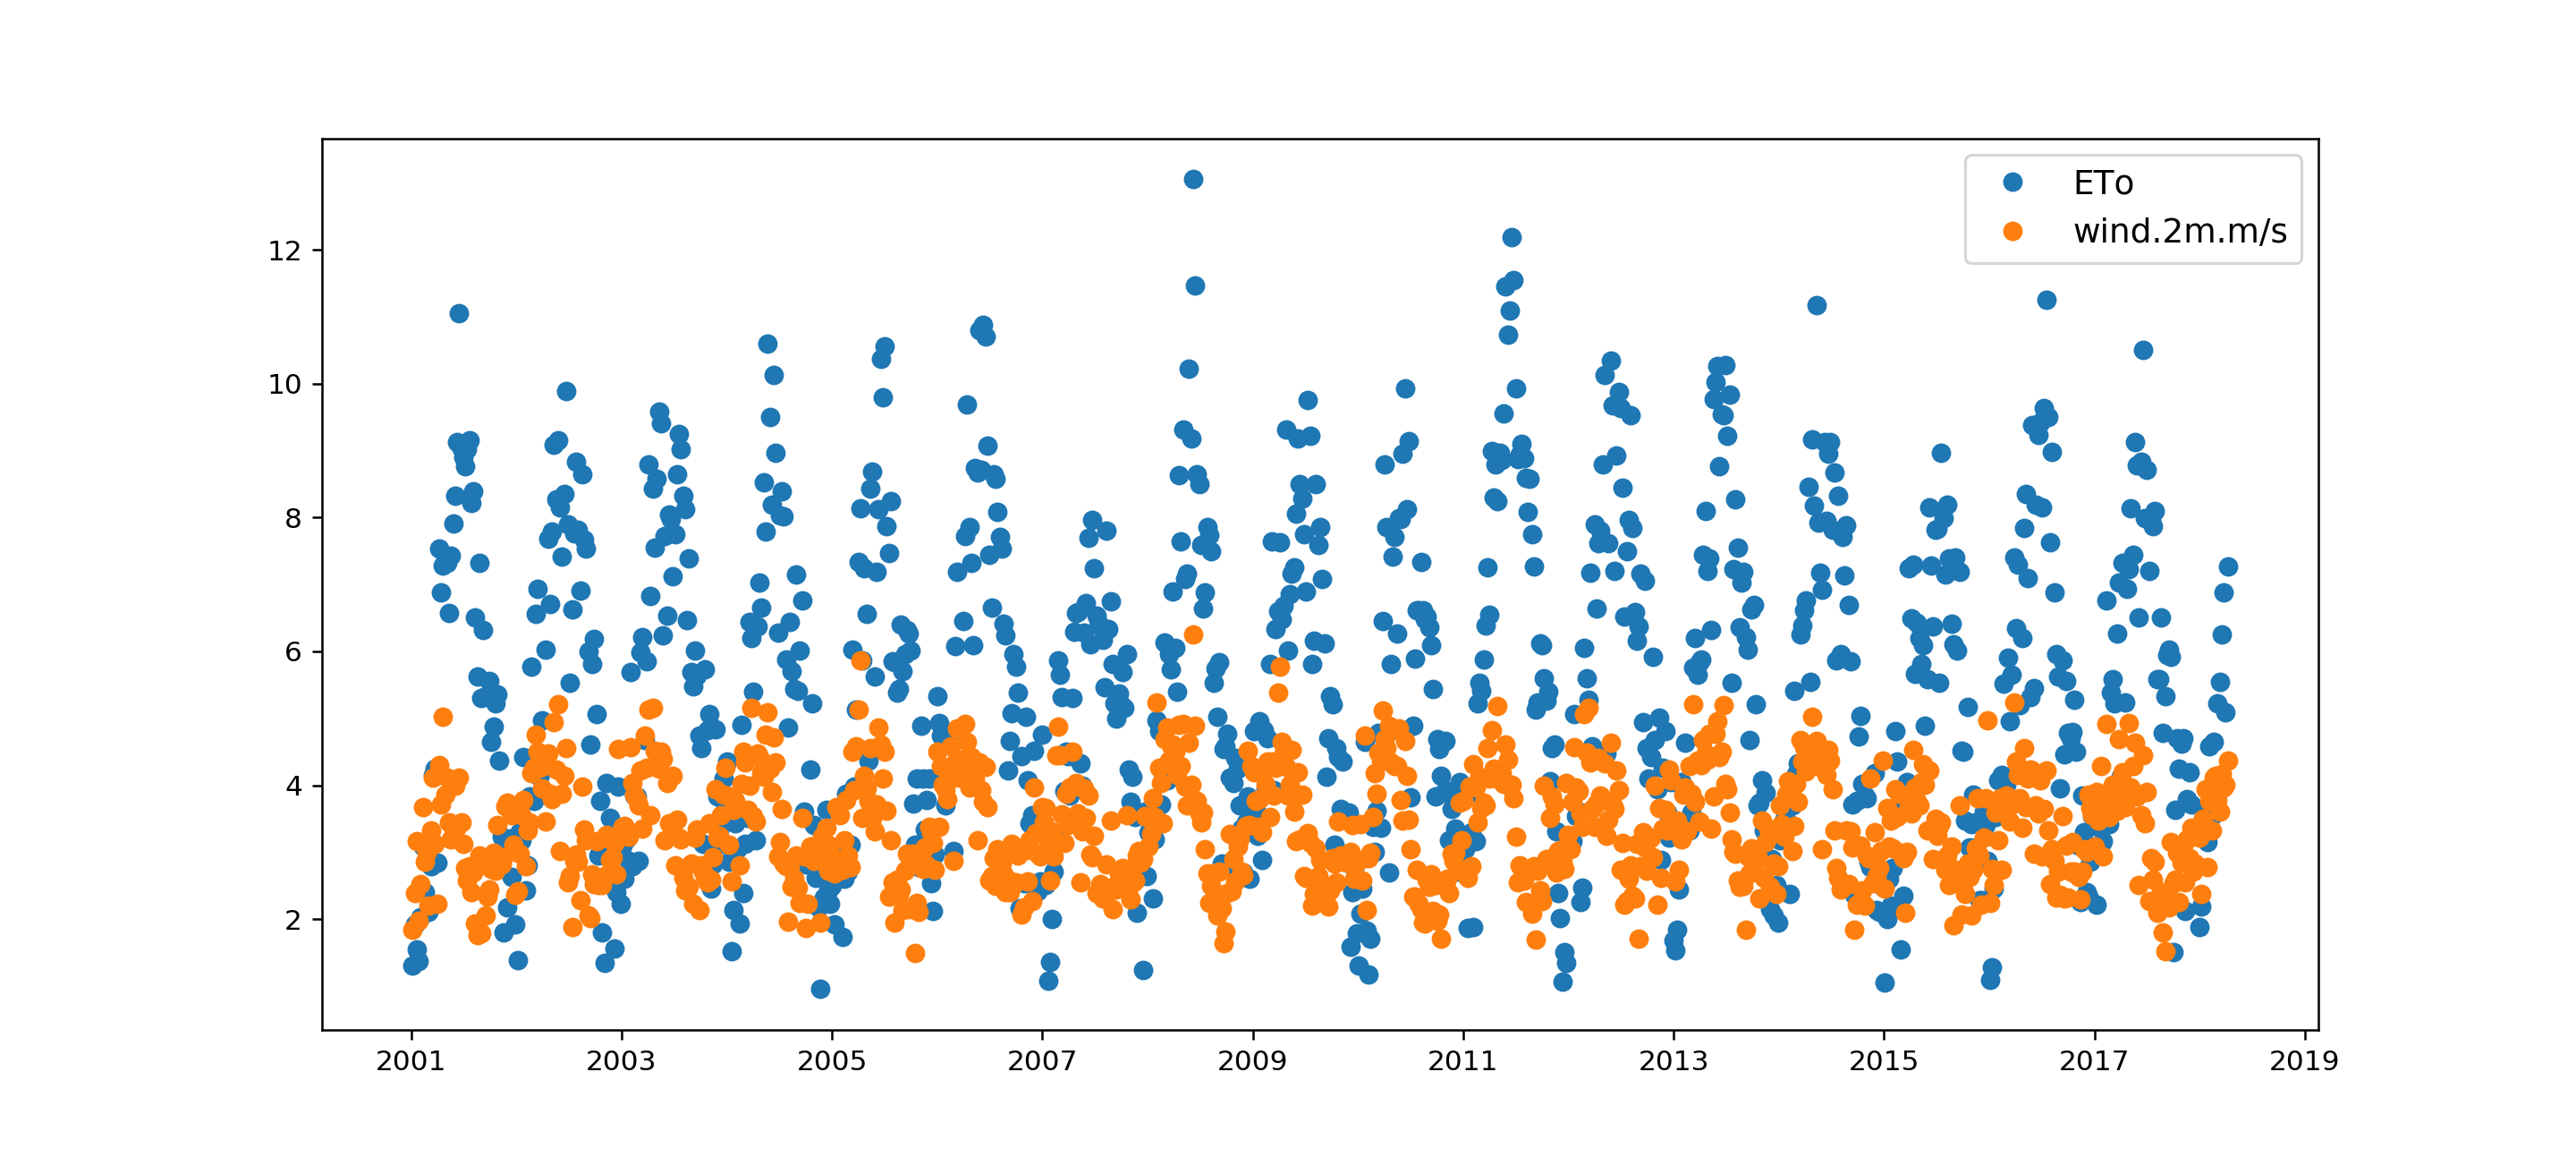

In [73]:
%matplotlib notebook

d = {"ETo":DFxWeek["ETo"],"wind.2m.m/s":DFxWeek["wind.2m.m/s"]}
data = pd.DataFrame(data=d) 
cols_data = list(data)
plt.figure(figsize=(12.8,5.75))

for i in cols_data:
    plt.plot(data[i], "o")
    
plt.legend(prop={'size':12})

<IPython.core.display.Javascript object>


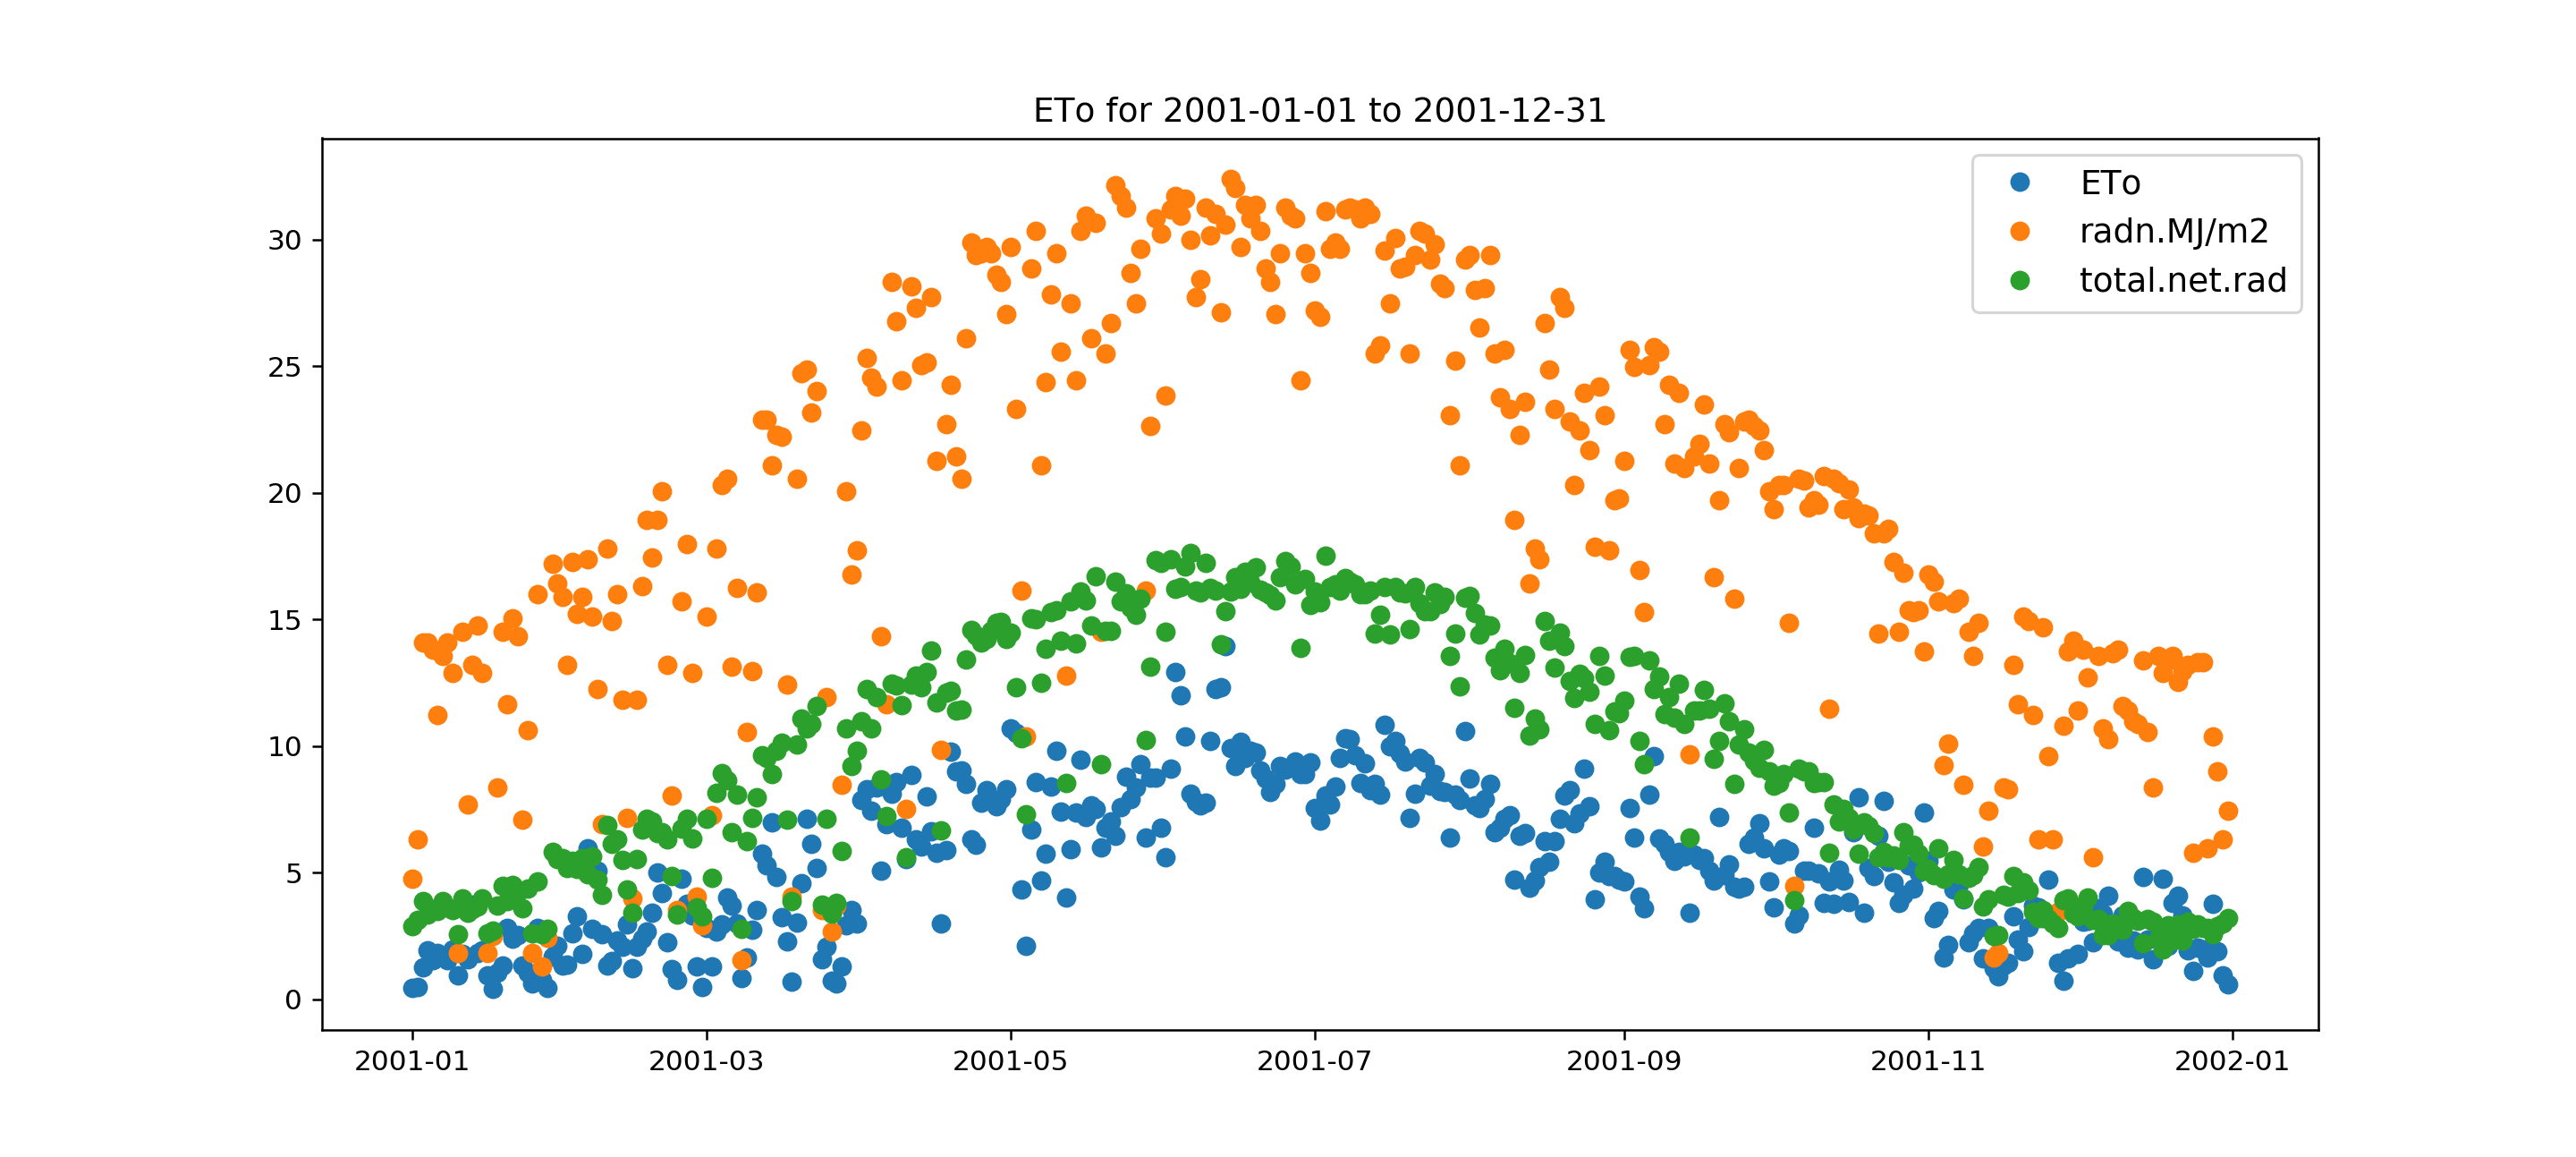

Text(0.5,1,'ETo for 2001-01-01 to 2001-12-31')

In [74]:
d = {"ETo":DF["ETo"],"radn.MJ/m2":DF["radn.MJ/m2"],"total.net.rad":DF["total.net.rad"]}
data = pd.DataFrame(data=d)
data_range = data.loc['2001-01-01':'2001-12-31']
cols_data_range = list(data_range)
plt.figure(figsize=(12.8,5.75))

for i in cols_data_range:
    plt.plot(data_range[i], "o")
    
plt.legend(prop={'size':12})
plt.title("ETo for 2001-01-01 to 2001-12-31")

In [75]:
data_scaled = (data - data.mean()) / data.std()

<IPython.core.display.Javascript object>


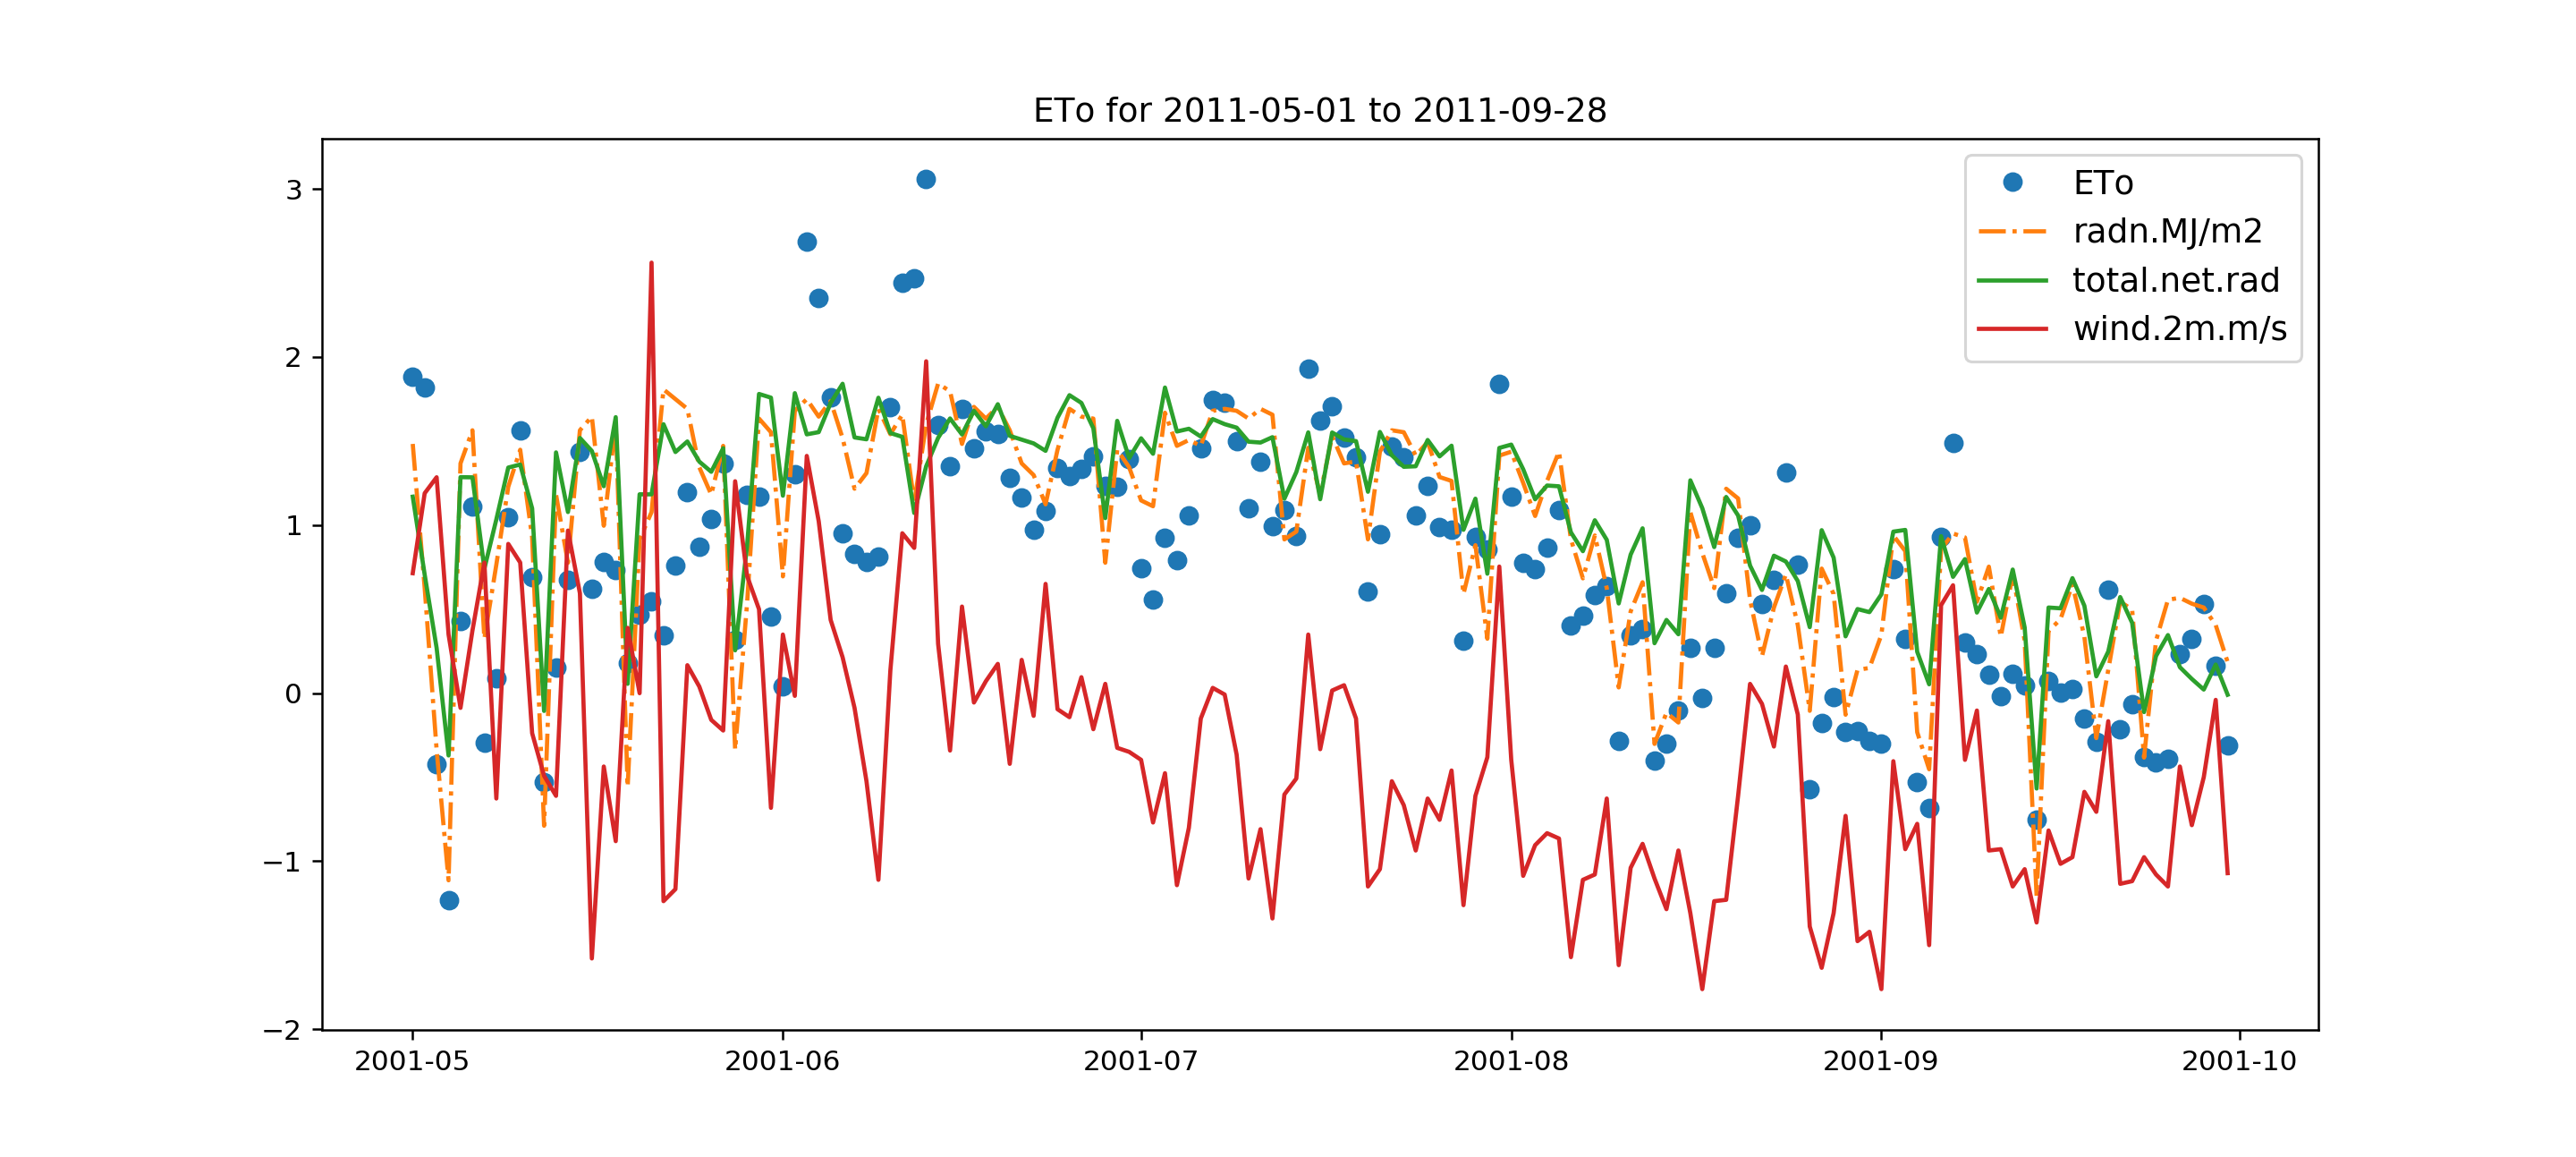

Plotting: ETo
Plotting: radn.MJ/m2
Plotting: total.net.rad
Plotting: wind.2m.m/s


Text(0.5,1,'ETo for 2011-05-01 to 2011-09-28')

In [76]:
d = {"ETo":DF["ETo"],"radn.MJ/m2":DF["radn.MJ/m2"],"total.net.rad":DF["total.net.rad"],"wind.2m.m/s":DF["wind.2m.m/s"]}
data = pd.DataFrame(d)
data_scaled = (data - data.mean()) / data.std()
data_scaled_range = data_scaled.loc["2001-05-01":"2001-09-30"]
cols_data_scaled_range = list(data_scaled_range)
plt.figure(figsize=(12.8,5.75))

for i in cols_data_scaled_range:
    if i == "ETo":
        plt.plot(data_scaled_range[i], "o")
    elif i == "radn.MJ/m2":
        plt.plot(data_scaled_range[i], "-.")
    else:
        plt.plot(data_scaled_range[i])
    print("Plotting: " + str(i))
    
plt.legend(prop={'size':12})
plt.title("ETo for 2011-05-01 to 2011-09-28")

### Polynomial regression: ###

In [77]:
def get_polynomial_regression(x_in, y_in, degree_of_poly):

    x = x_in
    y = y_in

    z = np.polyfit(x, y, degree_of_poly)
    f = np.poly1d(z) # fit_fn is now a function which takes in x and returns an estimate for y
    x_new = np.linspace(x[0], x[-1], len(x))
    y_new = f(x_new)
    
    return(x_new, y_new, f, z)

In [78]:
(x1,y1, fit_fn1, z) = get_polynomial_regression(DF["wind.2m.m/s"],DF["ETo"],1)

## Linear regression with r squared: ##

### Some plotting functions: ###

In [79]:
def plot_two_var_regress(x, y):

    d = {"x":x,"y":y}
    data_in = pd.DataFrame(d)
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_in["x"], data_in["y"])

    plt.figure(figsize=(8,6))
    plt.plot(data_in["x"], data_in["y"], "go", label = "x vs y")
    plt.plot(data_in["x"], intercept + slope*data_in["x"], 'r', label='fitted line')
    plt.legend(prop={'size':12})
    plt.xlabel(str(x.name))
    plt.ylabel(str(y.name))
    plt.title(str(y.name) + " as a function of " + str(x.name))
    
    
    return plt

In [80]:
def stats_linear_regress(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return slope, intercept, r_value, p_value, std_err

In [81]:
def printmd(string):
    display(Markdown(string))

In [82]:
def show_stats(X,Y,Slope,Intercept,R_value,P_value,Std_err):   
    
    if Intercept > 0 :
        sign = "+"
    else:
        sign = "-"
    
    printmd("""<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
        <p style="font-size: 1.3vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>""" + str(Y.name) + " as a function of " + str(X.name) + """</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>R Square: """ + str(round((R_value**2), 3)) + """</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Intercept: """ + str(round((Intercept), 3)) + """</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Standard Error: """ + str(round((Std_err), 3)) + """</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 5px 10px">

        <b>Equation: y = """ + str(round(Slope, 3)) + "x  +  " + str(round(Intercept, 3)) + """</b>
    </p>   
    </div>""")    

<IPython.core.display.Javascript object>


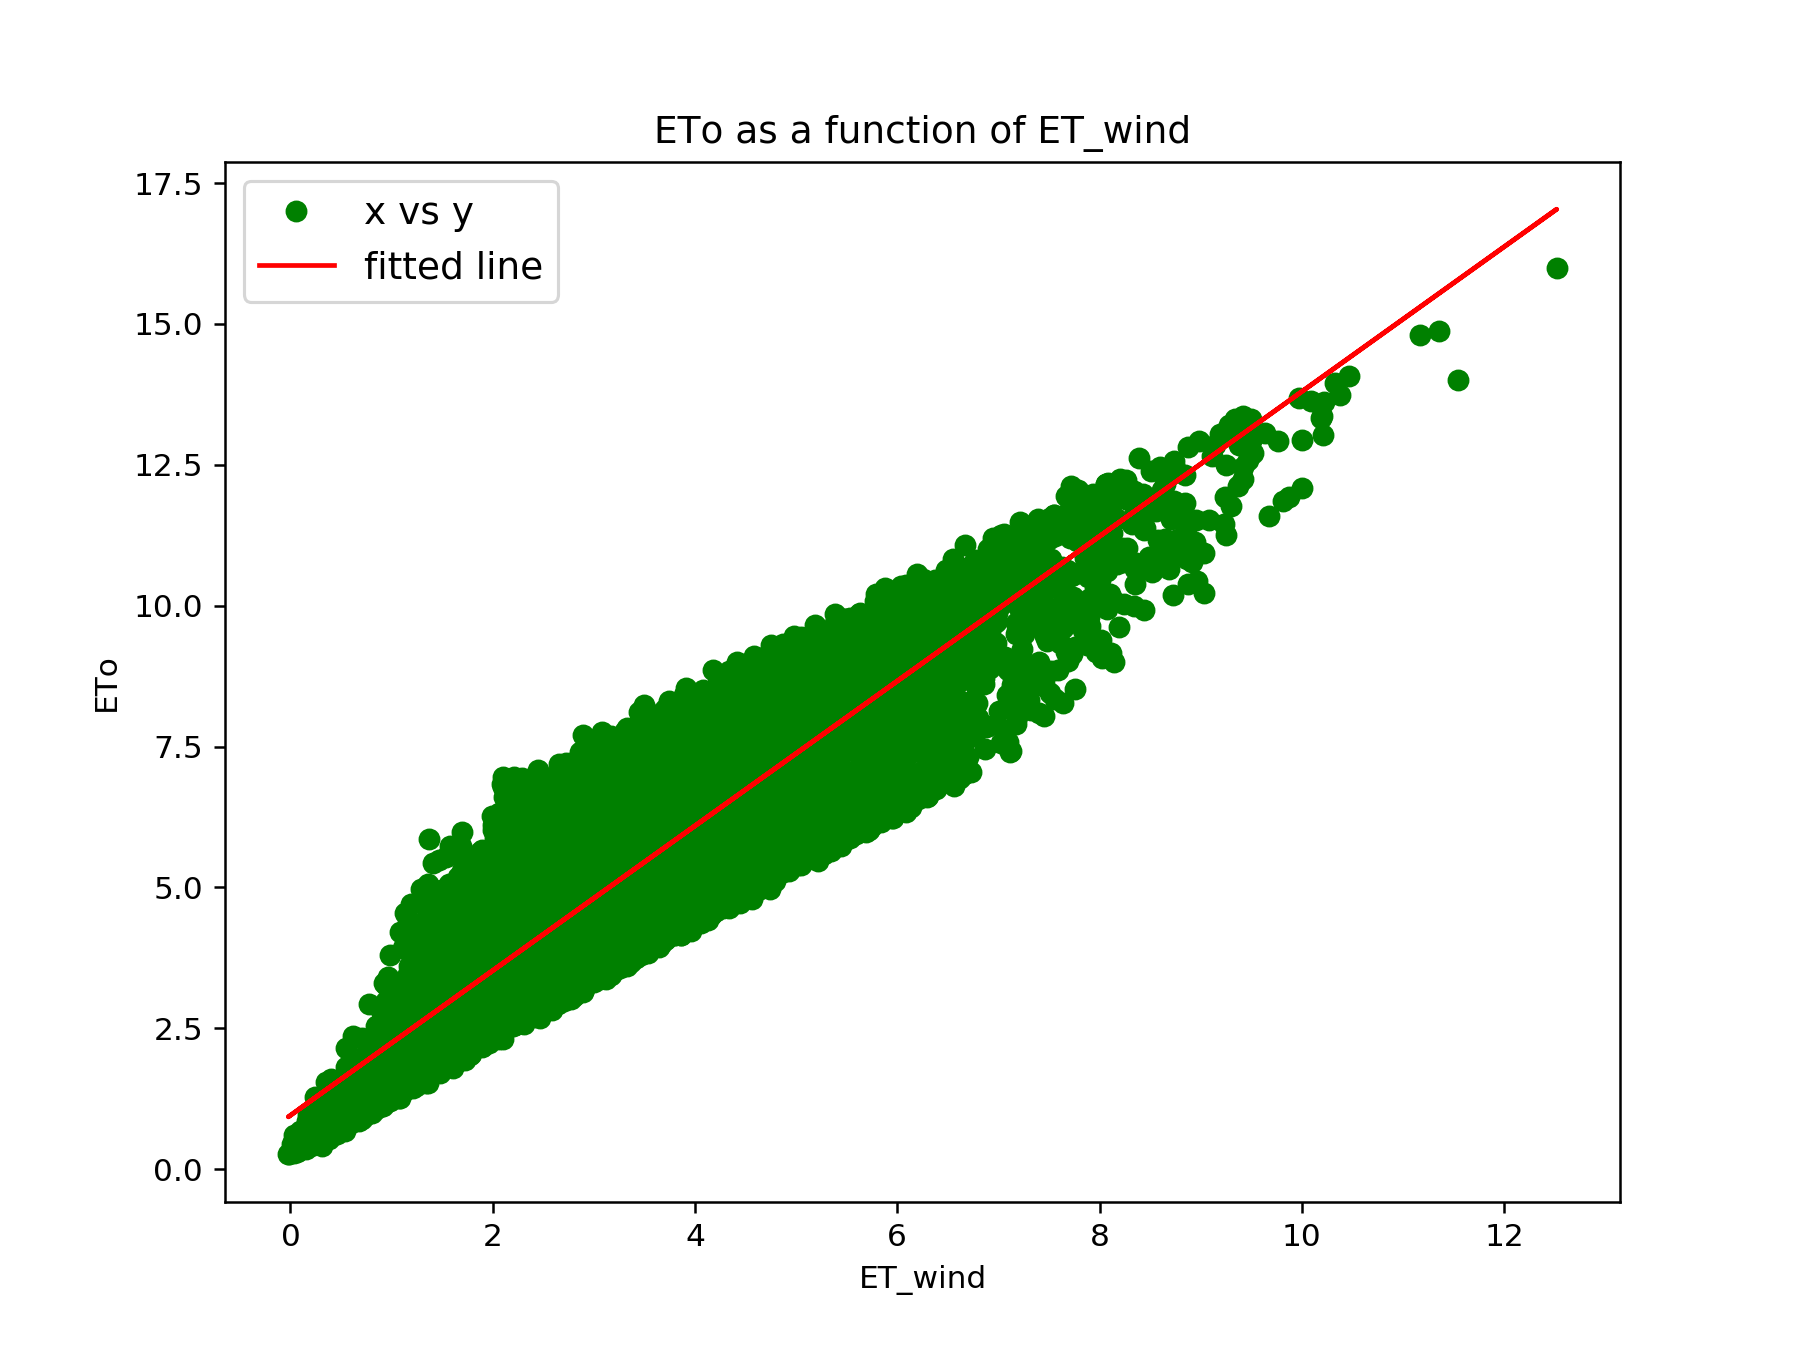

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
        <p style="font-size: 1.3vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>ETo as a function of ET_wind</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>R Square: 0.812</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Intercept: 0.956</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Standard Error: 0.008</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 5px 10px">

        <b>Equation: y = 1.284x  +  0.956</b>
    </p>   
    </div>

In [83]:
x = DF["ET_wind"]
y = DF["ETo"]

plot_two_var_regress(x, y)
slope, intercept, r_value, p_value, std_err = stats_linear_regress(x, y)
show_stats(x,y,slope,intercept,r_value,p_value,std_err)


<IPython.core.display.Javascript object>


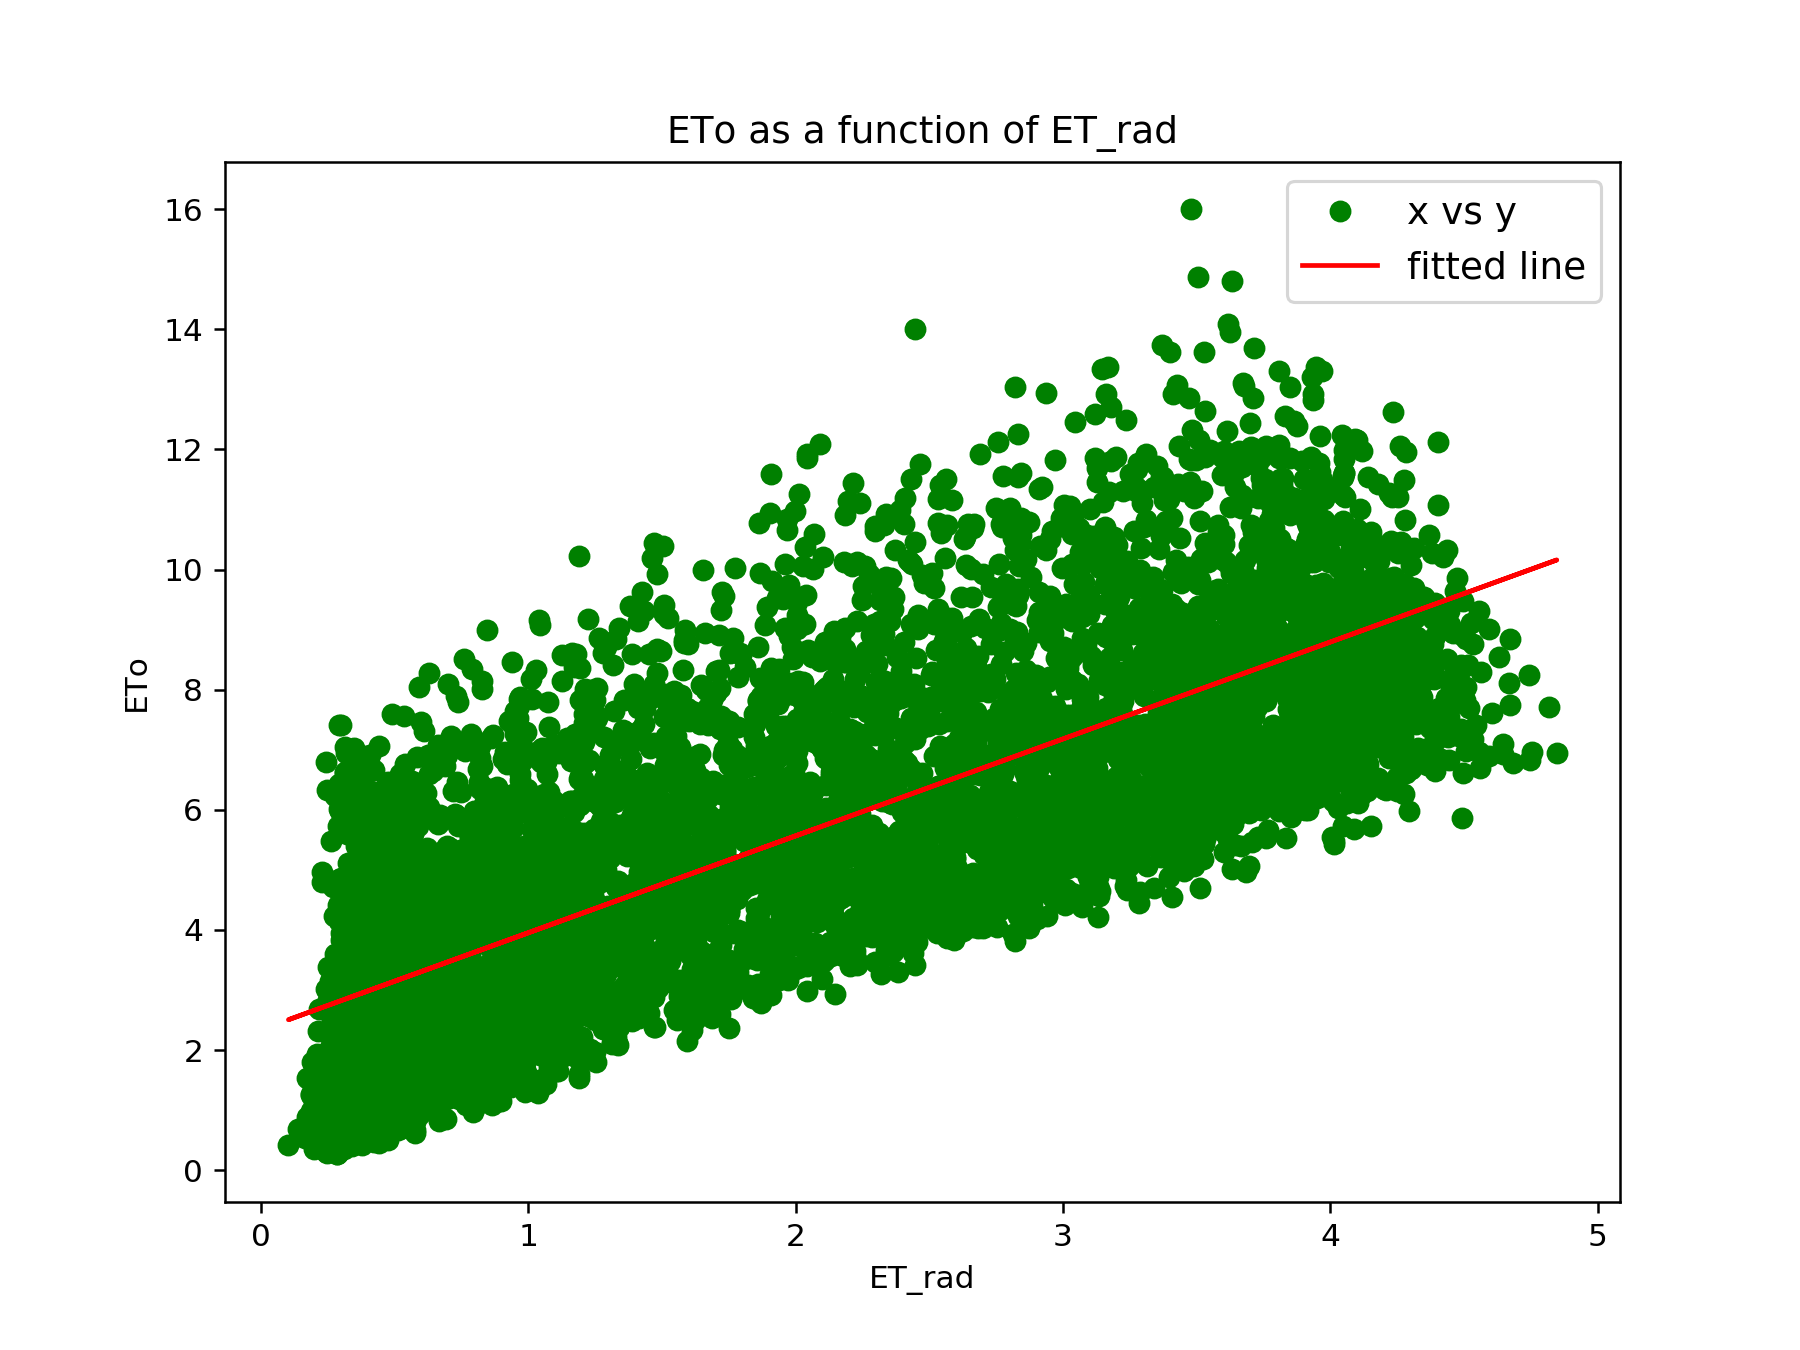

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
        <p style="font-size: 1.3vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>ETo as a function of ET_rad</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>R Square: 0.594</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Intercept: 2.337</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Standard Error: 0.017</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 5px 10px">

        <b>Equation: y = 1.614x  +  2.337</b>
    </p>   
    </div>

In [84]:
x = DF["ET_rad"]
y = DF["ETo"]

plot_two_var_regress(x, y)
slope, intercept, r_value, p_value, std_err = stats_linear_regress(x, y)
show_stats(x,y,slope,intercept,r_value,p_value,std_err)


<IPython.core.display.Javascript object>


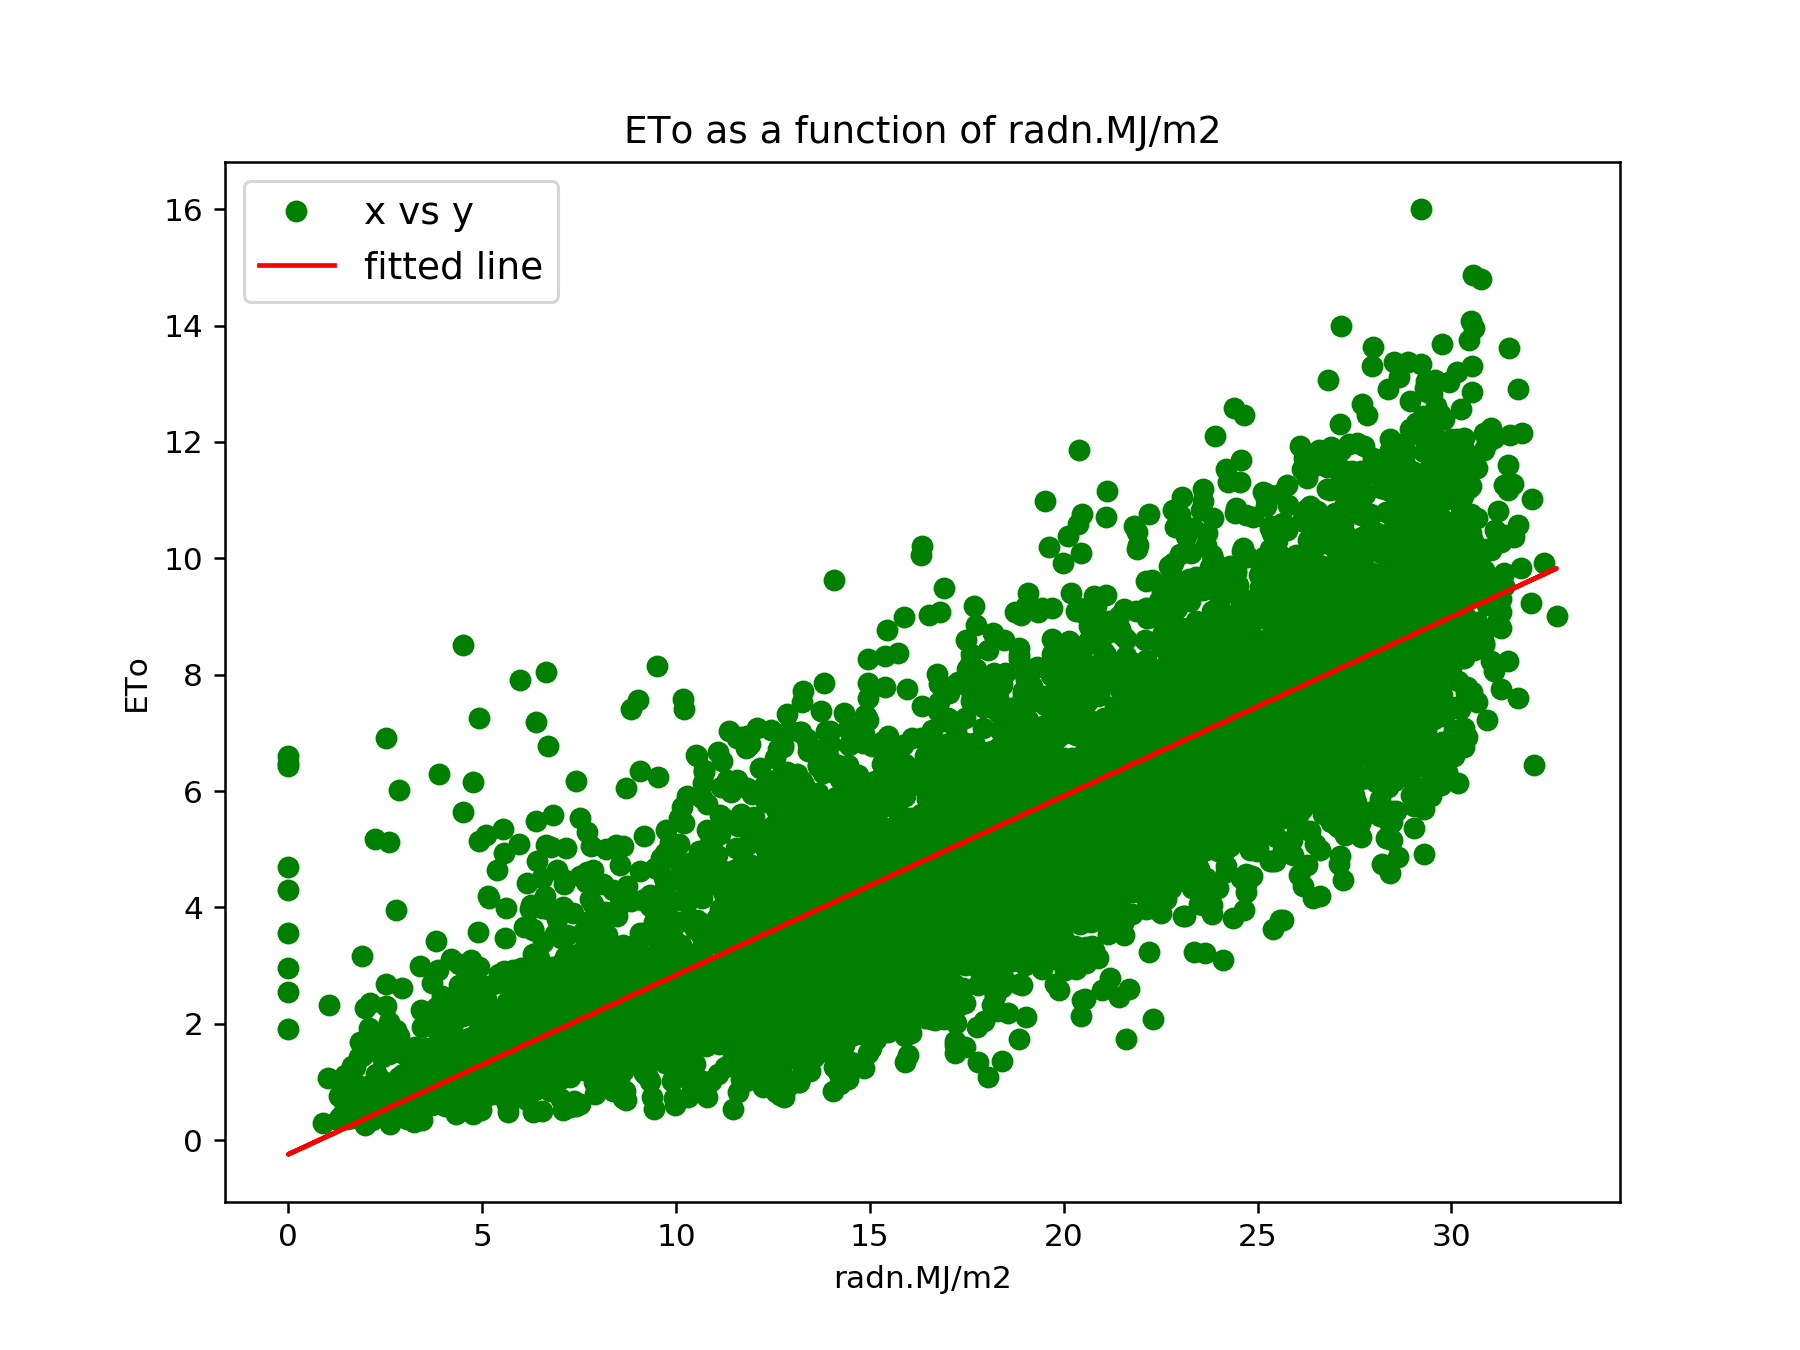

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
        <p style="font-size: 1.3vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>ETo as a function of radn.MJ/m2</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>R Square: 0.691</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Intercept: -0.241</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Standard Error: 0.003</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 5px 10px">

        <b>Equation: y = 0.308x  +  -0.241</b>
    </p>   
    </div>

In [85]:
x = DF["radn.MJ/m2"]
y = DF["ETo"]

plot_two_var_regress(x, y)
slope, intercept, r_value, p_value, std_err = stats_linear_regress(x, y)
show_stats(x,y,slope,intercept,r_value,p_value,std_err)


<IPython.core.display.Javascript object>


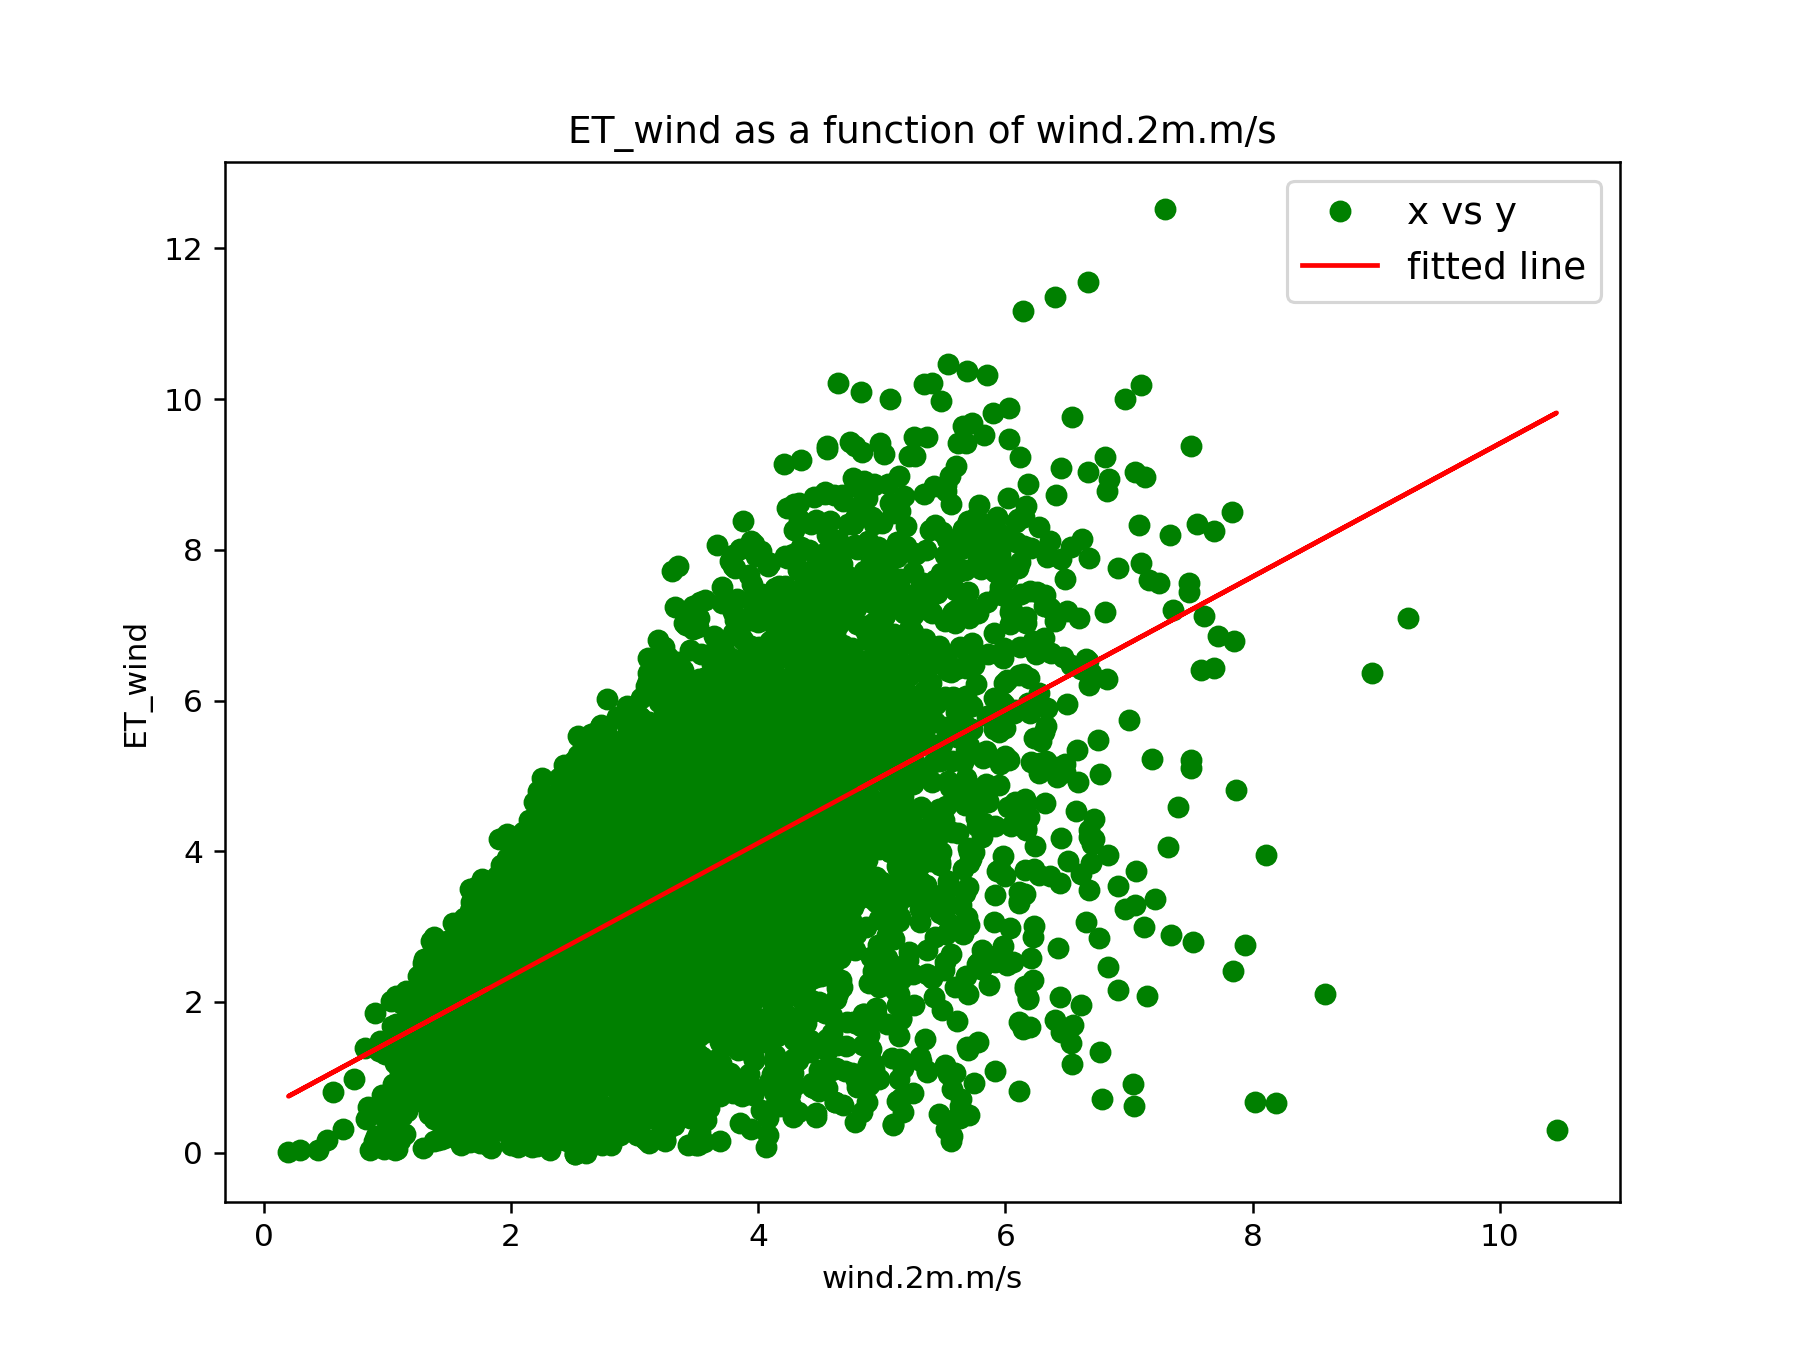

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
        <p style="font-size: 1.3vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>ET_wind as a function of wind.2m.m/s</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>R Square: 0.331</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Intercept: 0.572</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Standard Error: 0.016</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 5px 10px">

        <b>Equation: y = 0.884x  +  0.572</b>
    </p>   
    </div>

In [86]:
x = DF["wind.2m.m/s"]
y = DF["ET_wind"]

plot_two_var_regress(x, y)
slope, intercept, r_value, p_value, std_err = stats_linear_regress(x, y)
show_stats(x,y,slope,intercept,r_value,p_value,std_err)


<IPython.core.display.Javascript object>


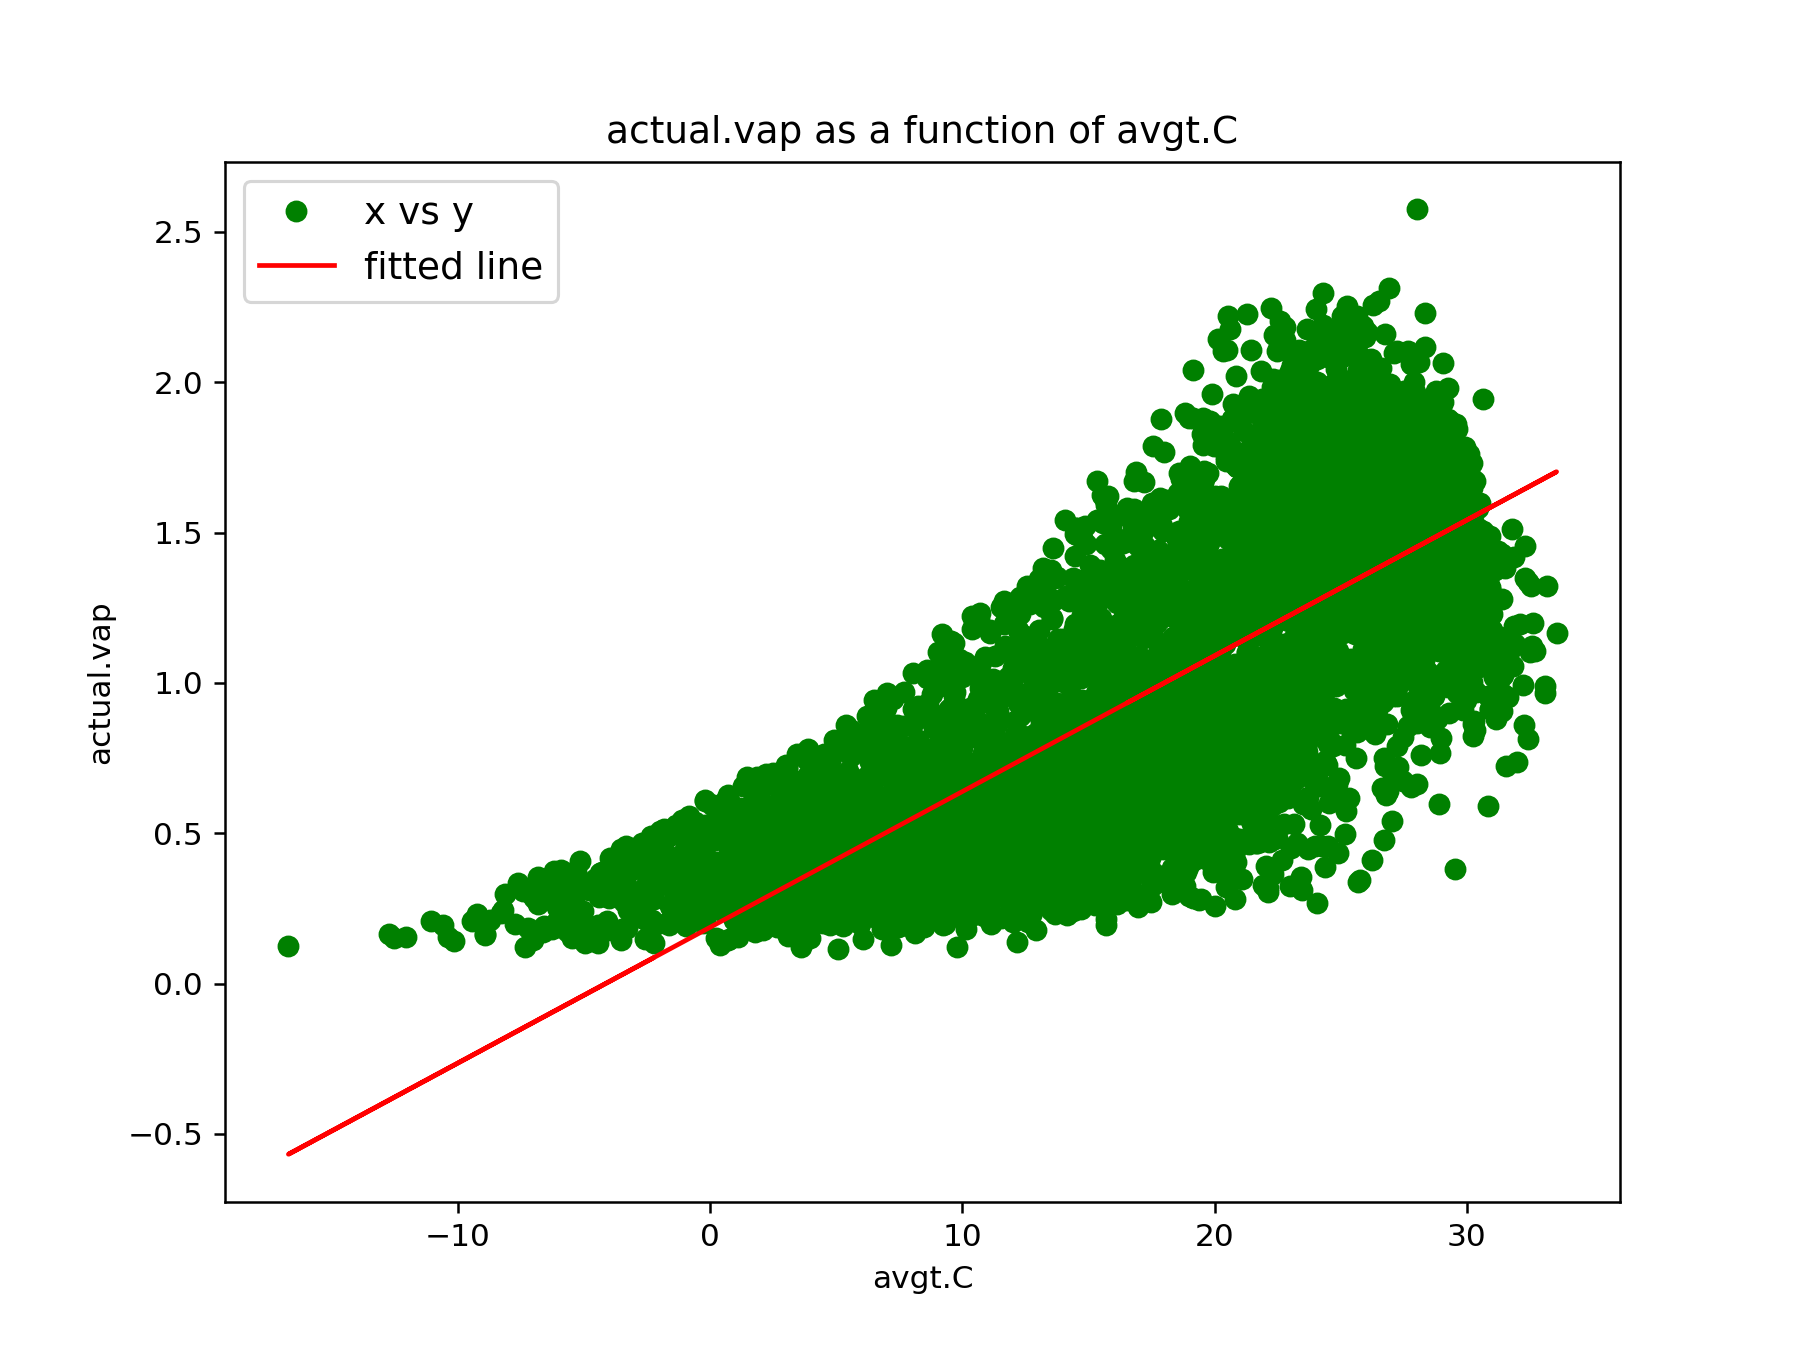

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
        <p style="font-size: 1.3vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>actual.vap as a function of avgt.C</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  10px 10px 0px 10px;line-height">

        <b>R Square: 0.599</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Intercept: 0.187</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 0px 10px;line-height">

        <b>Standard Error: 0.0</b>
            </p>
        <p style="font-size: 1vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
                  0px 10px 5px 10px">

        <b>Equation: y = 0.045x  +  0.187</b>
    </p>   
    </div>

In [87]:
x = DF["avgt.C"]
y = DF["actual.vap"]

plot_two_var_regress(x, y)
slope, intercept, r_value, p_value, std_err = stats_linear_regress(x, y)
show_stats(x,y,slope,intercept,r_value,p_value,std_err)


In [88]:
data_scaled = (data - data.mean()) / data.std()

<IPython.core.display.Javascript object>


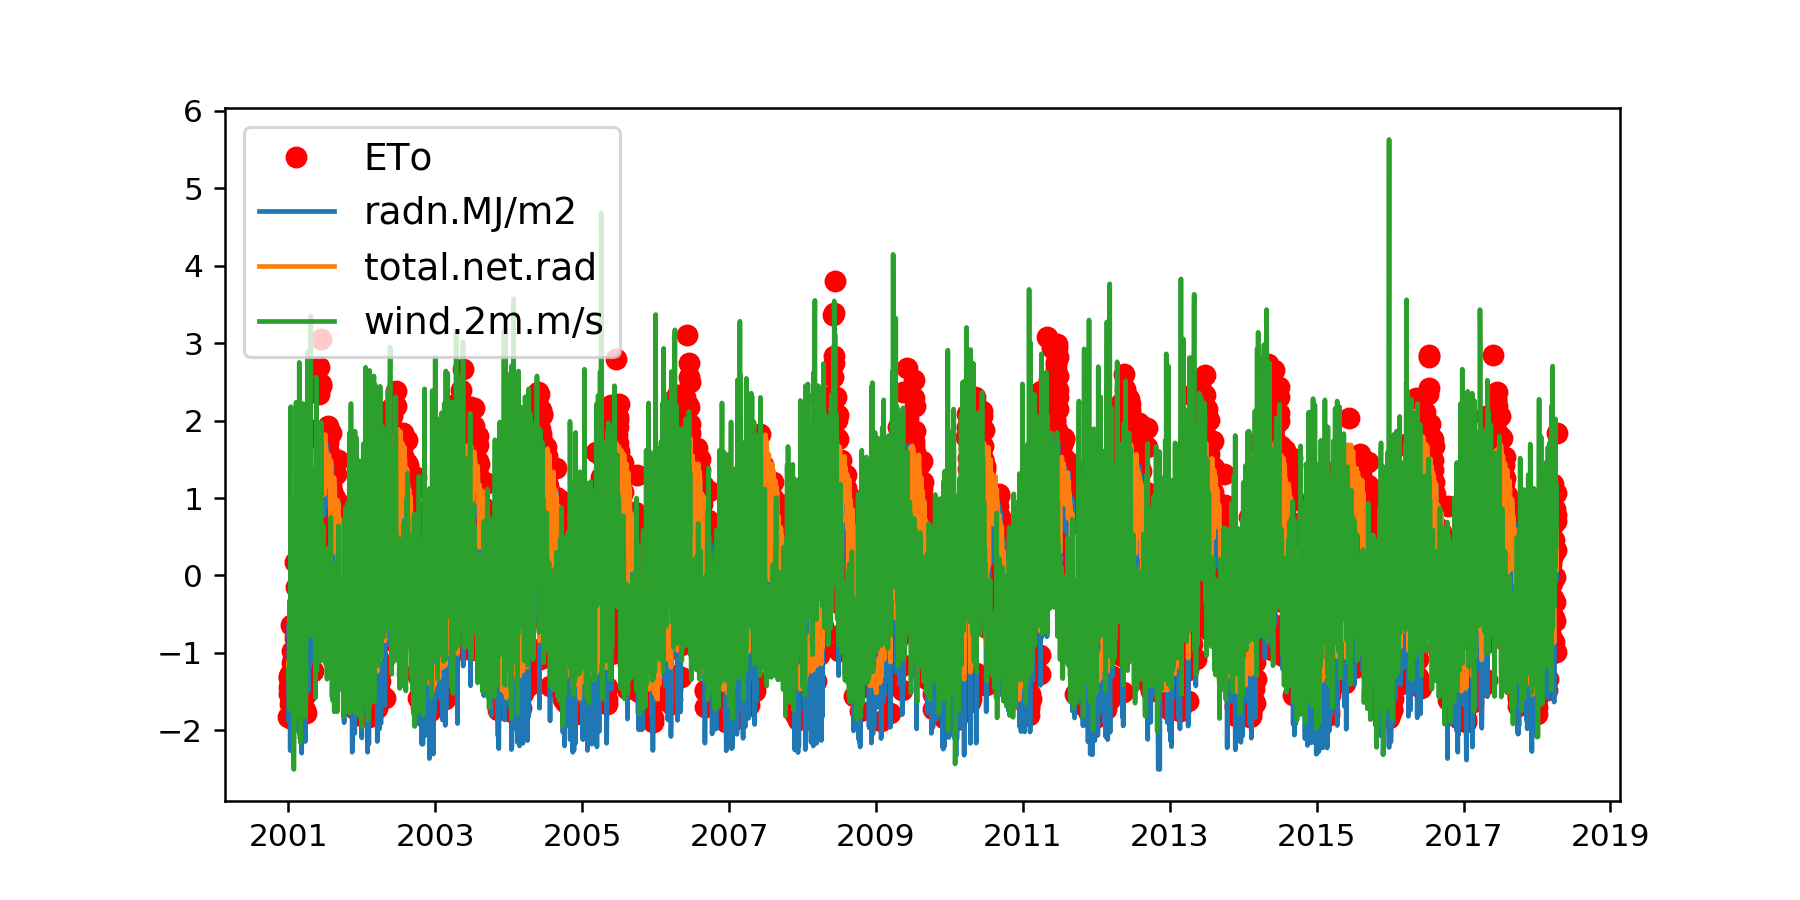

In [89]:
cols_data = list(data_scaled)
plt.figure(figsize=(8,4))

for i in cols_data:
    if i == "ETo":
        plt.plot(data_scaled[i], "ro")
    else:
        plt.plot(data_scaled[i])
    
plt.legend(prop={'size':12})

In [90]:
qgrid_widget = qgrid.QgridWidget(df=data, show_toolbar=True)
qgrid_widget.layout = ipyw.Layout(width='60%')
qgrid_widget

QgridWidget(grid_options={'defaultColumnWidth': 150, 'rowHeight': 28, 'filterable': True, 'highlightSelectedCe…

## FAO-56 Link below: ##

http://www.fao.org/docrep/X0490E/x0490e08.htm#chapter%204%20%20%20determination%20of%20eto

## University of Florida Paper below: ##

In [91]:
from IPython.display import IFrame
IFrame("https://drive.google.com/uc?id=1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir", width=1000, height=500) # variable 

#### This is a way to output python code to the html side ####

In [ ]:
def bar():
    from IPython.display import display, HTML
    chart = HTML('<h1>Hello, world!</h1>')
    # or chart = charts.plot(...)
    display(chart)

bar()